In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
%matplotlib inline
from pathlib import Path

In [76]:
blotch = pd.read_csv("C:\Users\Zade\Desktop\HonorsMaterials\ForTask1\p4_analysis\P4_catalog_v1.1_L1C_cut_0.5_blotch.csv")

In [77]:
fan = pd.read_csv("C:\Users\Zade\Desktop\HonorsMaterials\ForTask1\p4_analysis\P4_catalog_v1.1_L1C_cut_0.5_fan.csv")

In [78]:
blotch.head()#check that it loaded

,marking_id,angle,tile_id,image_x,image_y,n_votes,obsid,radius_1,radius_2,vote_ratio,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
0,B000000,2.28,APF0000cia,3330.27,5573.00,4,ESP_012079_0945,22.13,15.78,1.00,...,0.10,214.785,0.25,126.856883,-67.239204,257.001479,-3370.630963,-85.493625,-85.546304,104.661641
1,B000001,1.38,APF0000cia,3593.60,5706.40,5,ESP_012079_0945,25.55,15.73,0.55,...,0.05,214.785,0.25,126.856883,-67.166591,257.008699,-3370.633997,-85.493821,-85.546498,104.646095
2,B000004,7.16,APF0000cic,98.10,34394.70,10,ESP_012079_0945,84.54,48.33,1.00,...,0.18,214.785,0.25,126.856883,-65.402430,263.908435,-3370.353989,-85.387847,-85.441752,103.918757
3,B000005,81.00,APF0000cic,825.58,34203.38,8,ESP_012079_0945,51.92,35.12,1.00,...,0.97,214.785,0.25,126.856883,-65.252200,263.799557,-3370.366323,-85.390259,-85.444136,103.893535
4,B000006,14.66,APF0000cic,152.67,34155.33,3,ESP_012079_0945,184.94,71.25,1.00,...,0.25,214.785,0.25,126.856883,-65.411364,263.848867,-3370.358955,-85.388794,-85.442688,103.923605


In [79]:
fan.head()#check that it loaded

,marking_id,angle,distance,tile_id,image_x,image_y,n_votes,obsid,spread,version,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
0,F000000,205.56,179.71,APF0000ci9,2270.76,24336.16,35,ESP_012079_0945,88.03,1,...,-0.43,214.785,0.25,126.856883,-65.804336,261.407884,-3370.504345,-85.427383,-85.480829,104.129523
1,F000001,185.39,179.62,APF0000cia,3391.21,5640.60,15,ESP_012079_0945,21.35,1,...,-0.09,214.785,0.25,126.856883,-67.219114,257.011589,-3370.631413,-85.493546,-85.546226,104.656897
2,F000002,184.98,500.27,APF0000cia,3509.96,5876.70,10,ESP_012079_0945,18.91,1,...,-0.09,214.785,0.25,126.856883,-67.170611,257.055226,-3370.630794,-85.493039,-85.545725,104.644396
3,F000004,184.29,105.43,APF0000cia,3716.27,5824.50,6,ESP_012079_0945,26.41,1,...,-0.07,214.785,0.25,126.856883,-67.127761,257.024926,-3370.635002,-85.493723,-85.546401,104.637107
4,F000005,189.42,109.50,APF0000cia,3452.17,6033.00,3,ESP_012079_0945,22.58,1,...,-0.16,214.785,0.25,126.856883,-67.169940,257.096267,-3370.628302,-85.492368,-85.545061,104.642019


In [69]:
gf = fan.groupby("obsid")
gb = blotch.groupby("obsid")
#keys are obsids, values are the data frames for each object (n_votes, radii, l_s, etc)

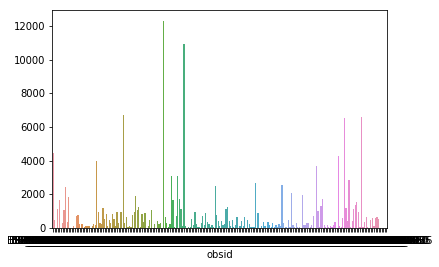

In [70]:
sns.barplot(gf.size().index, gf.size().values)

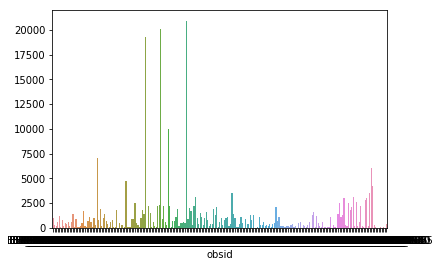

In [71]:
sns.barplot(gb.size().index, gb.size().values)

In [19]:
mixed = pd.concat([blotch, fans])

In [20]:
mixed.index.is_unique #can prevent w/ concat options ignore_index=True

False

In [21]:
#Can also read out first letter of marking ID as it's either an F or a B.  
#marking_id.str or little function with lambda trick from last meeting; marking_id.map(lambda x : x[0])  
#This returns first character in each marking_id, returns either F or B
#fans.marking_id.map(lambda x : x[0])
#blotch.marking_id.map(lambda x : x[0])

#attach identify_type as new column into dataframe
print mixed.marking_id.map(lambda x : x[0]).head()
print mixed.marking_id.map(lambda x : x[0]).tail()
mixed['mtype'] = mixed.marking_id.map(lambda x : x[0])
#group by seaborn instead of pandas, so that it likes the dataframe stuff two lines below.

0    B
1    B
2    B
3    B
4    B
Name: marking_id, dtype: object
159282    F
159283    F
159284    F
159285    F
159286    F
Name: marking_id, dtype: object


In [22]:
group_mixed = mixed.groupby('obsid')

In [27]:
mixed.head()

,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,Longitude,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude,angle,distance,image_x,...,radius_2,spread,tile_id,version,vote_ratio,x,x_angle,y,y_angle,mtype
0,-67.239204,257.001479,-3370.630963,104.661641,-85.493625,-85.546304,NaN,2.28,NaN,3330.27,...,15.78,NaN,APF0000cia,NaN,1.00,370.27,0.50,93.00,0.10,B
1,-67.166591,257.008699,-3370.633997,104.646095,-85.493821,-85.546498,NaN,1.38,NaN,3593.60,...,15.73,NaN,APF0000cia,NaN,0.55,633.60,0.20,226.40,0.05,B
2,-65.402430,263.908435,-3370.353989,103.918757,-85.387847,-85.441752,NaN,7.16,NaN,98.10,...,48.33,NaN,APF0000cic,NaN,1.00,98.10,0.58,418.70,0.18,B
3,-65.252200,263.799557,-3370.366323,103.893535,-85.390259,-85.444136,NaN,81.00,NaN,825.58,...,35.12,NaN,APF0000cic,NaN,1.00,825.58,0.16,227.38,0.97,B
4,-65.411364,263.848867,-3370.358955,103.923605,-85.388794,-85.442688,NaN,14.66,NaN,152.67,...,71.25,NaN,APF0000cic,NaN,1.00,152.67,0.93,179.33,0.25,B


In [38]:
import shapely as sp
from shapely.geometry import Point
from shapely.geometry import Polygon

In [35]:
#want to create something that defines points for each object, with the values being longitude and planetocentriclatititude for
#x, y values.  need shapely and pandas

In [59]:
gf.size()

obsid
ESP_011296_0975    4496
ESP_011341_0980     455
ESP_011348_0950       4
ESP_011350_0945    1117
ESP_011351_0945    1647
ESP_011370_0980      13
ESP_011394_0935     285
ESP_011403_0945    1037
ESP_011404_0945    2467
ESP_011406_0945     360
ESP_011407_0945    1813
ESP_011408_0930      13
ESP_011413_0970      16
ESP_011420_0930     135
ESP_011431_0930      25
ESP_011447_0950     708
ESP_011448_0950     745
ESP_011460_0980     260
ESP_011486_0980     243
ESP_011491_0985     214
ESP_011515_0980      51
ESP_011526_0980     140
ESP_011544_0985      84
ESP_011557_0985     134
ESP_011565_0930      22
ESP_011606_0930      88
ESP_011623_0985     214
ESP_011671_0935     182
ESP_011680_1055    4005
ESP_011697_0980     963
                   ... 
ESP_020955_0930      31
ESP_020959_0985     584
ESP_021454_0925    6557
ESP_021455_0935    1211
ESP_021460_0985     432
ESP_021468_0935    2869
ESP_021482_0950      76
ESP_021483_0930     434
ESP_021491_0950    1171
ESP_021494_0945    1350
ESP_021495